#<b>Milestone 2

###<b> Mounting the Drive

In [ ]:
# Mounting the drive
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


###<b>Loading libraries</b>

In [ ]:
# Importing libraries required to load the data
import zipfile

import os

from PIL import Image

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler


import tensorflow as tf

from tensorflow.keras import optimizers

from tensorflow.keras import backend

from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, LeakyReLU, BatchNormalization

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from random import shuffle

backend.clear_session()


# To ignore warnings
import warnings

warnings.filterwarnings('ignore')

# Remove the limit from the number of displayed columns and rows. It helps to see the entire dataframe while printing it
pd.set_option("display.max_columns", None)

pd.set_option("display.max_rows", 200)

### <b>Let us load the data</b>

**Note:** 
- You must download the dataset from the link provided on Olympus and upload the same on your Google drive before executing the code in the next cell.
- In case of any error, please make sure that the path of the file is correct as the path may be different for you.

In [ ]:
# Storing the path of the data file from the Google drive
path = '/content/drive/MyDrive/Colab Notebooks/Capstone/cell_images.zip'

# The data is provided as a zip file so we need to extract the files from the zip file
with zipfile.ZipFile(path, 'r') as zip_ref:

    zip_ref.extractall()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

The files have been extracted to the local session of Google Colab. The extracted folder would have the following structure:

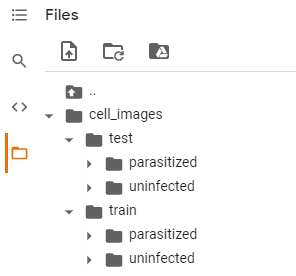

The extracted folder has different folders for train and test data which further contains the different sizes of images for parasitized and uninfected cells within the respective folder name. 

The size of all images must be the same and should be converted to 4D arrays so that they can be used as an input for the convolutional neural network. Also, we need to create the labels for both types of images to be able to train and test the model. 

Let's do the same for the training data first and then we will use the same code for the test data as well.

In [ ]:
# Storing the path of the extracted "train" folder 
train_dir = '/content/cell_images/train'

# Size of image so that each image has the same size
SIZE = 64

# Empty list to store the training images after they are converted to NumPy arrays
train_images = []

# Empty list to store the training labels (0 - uninfected, 1 - parasitized)
train_labels = []

In [ ]:
# We will run the same code for "parasitized" as well as "uninfected" folders within the "train" folder
for folder_name in ['/parasitized/', '/uninfected/']:
    
    # Path of the folder
    images_path = os.listdir(train_dir + folder_name)

    for i, image_name in enumerate(images_path):
    
        try:
    
            # Opening each image using the path of that image
            image = Image.open(train_dir + folder_name + image_name)

            # Resizing each image to (64, 64)
            image = image.resize((SIZE, SIZE))

            # Converting images to arrays and appending that array to the empty list defined above
            train_images.append(np.array(image))

            # Creating labels for parasitized and uninfected images
            if folder_name == '/parasitized/':
                
                train_labels.append(1)
            
            else:
            
                train_labels.append(0)
        
        except Exception:
        
            pass       

# Converting lists to arrays
train_images = np.array(train_images)

train_labels = np.array(train_labels)

In [ ]:
# Storing the path of the extracted "test" folder 
test_dir = '/content/cell_images/test'

# Size of image so that each image has the same size (it must be same as the train image size)
SIZE = 64

# Empty list to store the testing images after they are converted to NumPy arrays
test_images = []

# Empty list to store the testing labels (0 - uninfected, 1 - parasitized)
test_labels = []

In [ ]:
# We will run the same code for "parasitized" as well as "uninfected" folders within the "test" folder
for folder_name in ['/parasitized/', '/uninfected/']:
    
    # Path of the folder
    images_path = os.listdir(test_dir + folder_name)

    for i, image_name in enumerate(images_path):
     
        try:
            # Opening each image using the path of that image
            image = Image.open(test_dir + folder_name + image_name)
            
            # Resizing each image to (64, 64)
            image = image.resize((SIZE, SIZE))
            
            # Converting images to arrays and appending that array to the empty list defined above
            test_images.append(np.array(image))
            
            # Creating labels for parasitized and uninfected images
            if folder_name == '/parasitized/':
                
                test_labels.append(1)
            
            else:
            
                test_labels.append(0)
        
        except Exception:
        
            pass       

# Converting lists to arrays
test_images = np.array(test_images)

test_labels = np.array(test_labels)

###<b>Normalize the images

In [ ]:
# Try to normalize the train and test images by dividing it by 255 and convert them to float32 using astype function
train_images = (train_images/255).astype('float32')

test_images = (test_images/255).astype('float32')

As we have done our preprocessing required and performed some EDA to gain some insights in our Milestone-1 so now we will try to build our model and try evaluating its performance.

###<B>One Hot Encoding on the train and test labels

In [ ]:
# Encoding Train Labels
train_labels = to_categorical(train_labels, 2)

# Similarly let us try to encode test labels
test_labels = to_categorical(test_labels, 2)

### **Base Model**

**Note:** The Base Model has been fully built and evaluated with all outputs shown to give an idea about the process of the creation and evaluation of the performance of a CNN architecture. A similar process can be followed in iterating to build better-performing CNN architectures.

###<b> Importing the required libraries for building and training our Model

In [ ]:
# Clearing backend
from tensorflow.keras import backend

from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout  

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from random import shuffle

backend.clear_session()

# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

###<b> Building the model

In [ ]:
# Creating sequential model
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu", input_shape = (64, 64, 3)))

model.add(MaxPooling2D(pool_size = 2))

model.add(Dropout(0.2))

model.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))

model.add(MaxPooling2D(pool_size = 2))

model.add(Dropout(0.2))

model.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))

model.add(MaxPooling2D(pool_size = 2))

model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(512, activation = "relu"))

model.add(Dropout(0.4))

model.add(Dense(2, activation = "softmax")) # 2 represents output layer neurons 

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4128      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 32)        0

###<b> Compiling the model

In [ ]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

<b> Using Callbacks 

In [ ]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

<b> Fit and train our Model

In [ ]:
# Fit the model with min batch size as 32 can tune batch size to some factor of 2^power ] 
history = model.fit(train_images, train_labels, batch_size = 32, callbacks = callbacks, validation_split = 0.2, epochs = 20, verbose = 1)

Epoch 1/20
624/624 [==============================] - 14s 8ms/step - loss: 0.4212 - accuracy: 0.7944 - val_loss: 0.1811 - val_accuracy: 0.9211
Epoch 2/20
624/624 [==============================] - 6s 9ms/step - loss: 0.1302 - accuracy: 0.9519 - val_loss: 0.1661 - val_accuracy: 0.9683
Epoch 3/20
624/624 [==============================] - 5s 7ms/step - loss: 0.1044 - accuracy: 0.9662 - val_loss: 0.0748 - val_accuracy: 0.9898
Epoch 4/20
624/624 [==============================] - 4s 7ms/step - loss: 0.0825 - accuracy: 0.9721 - val_loss: 0.0859 - val_accuracy: 0.9838
Epoch 5/20
624/624 [==============================] - 6s 9ms/step - loss: 0.0726 - accuracy: 0.9743 - val_loss: 0.0530 - val_accuracy: 0.9886
Epoch 6/20
624/624 [==============================] - 5s 7ms/step - loss: 0.0719 - accuracy: 0.9760 - val_loss: 0.0602 - val_accuracy: 0.9874
Epoch 7/20
624/624 [==============================] - 5s 7ms/step - loss: 0.0681 - accuracy: 0.9768 - val_loss: 0.0657 - val_accuracy: 0.9840


###<b> Evaluating the model on test data

In [ ]:
accuracy = model.evaluate(test_images, test_labels, verbose = 1)
print('\n', 'Test_Accuracy:-', accuracy[1])

82/82 [==============================] - 1s 5ms/step - loss: 0.0609 - accuracy: 0.9769

 Test_Accuracy:- 0.9769230484962463


<b> Plotting the confusion matrix

82/82 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1300
           1       0.98      0.97      0.98      1300

    accuracy                           0.98      2600
   macro avg       0.98      0.98      0.98      2600
weighted avg       0.98      0.98      0.98      2600



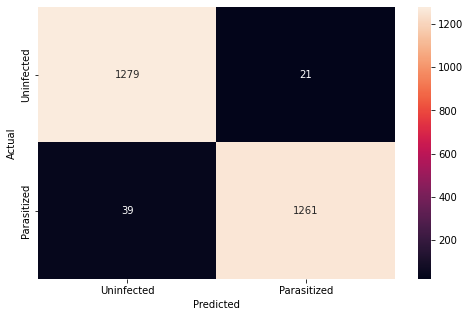

In [ ]:
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

pred = model.predict(test_images)

pred = np.argmax(pred, axis = 1) 

y_true = np.argmax(test_labels, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

<b>Plotting the train and validation curves

In [ ]:
# Function to plot train and validation accuracy 
def plot_accuracy(history):

    N = len(history.history["accuracy"])

    plt.figure(figsize = (7, 7))

    plt.plot(np.arange(0, N), history.history["accuracy"], label = "train_accuracy", ls = '--')

    plt.plot(np.arange(0, N), history.history["val_accuracy"], label = "val_accuracy", ls = '--')

    plt.title("Accuracy vs Epoch")
    
    plt.xlabel("Epochs")
    
    plt.ylabel("Accuracy")
    
    plt.legend(loc="upper left")

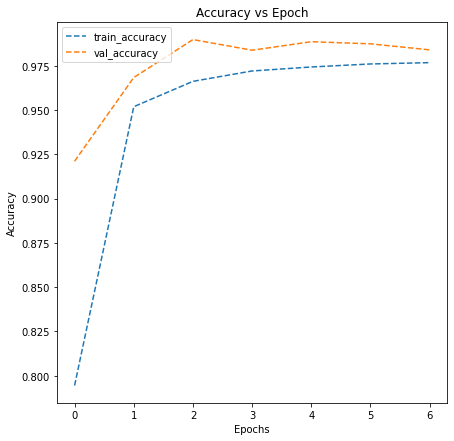

In [ ]:
plot_accuracy(history)


* Here we can clearly observe that the training and valiation accuracy are increasing 
* And we can also notice that validation accuracy is slightly higher than the train accuracy
*   The validation accuracy is higher than the train accuary meaning that there is likely some underfitting happening 
*   Otherwise the accuracy, precision, and F1-score are all 97%



So now let's try to build another model with few more add on layers and try to check if we can try to improve the model. Therefore try to build a model by adding few layers if required and altering the activation functions.

###<b> Model 1
####<b> Trying to improve the performance of our model by adding new layers


In [ ]:
backend.clear_session() # Clearing the backend for new model

###<b> Building the Model

In [ ]:
# Creating sequential model
model1 = Sequential()

# Build the model here and add new layers

model1.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu", input_shape = (64, 64, 3)))
model1.add(MaxPooling2D(pool_size = 2))
model1.add(Dropout(0.2))

model1.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))
model1.add(MaxPooling2D(pool_size = 2))
model1.add(Dropout(0.2))

model1.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))
model1.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))
model1.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))
model1.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))
model1.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))
model1.add(MaxPooling2D(pool_size = 2))
model1.add(Dropout(0.2))

model1.add(Flatten())

model1.add(Dense(512, activation = "relu"))

model1.add(Dropout(0.4))

model1.add(Dense(2, activation = "softmax")) # 2 represents output layer neurons 

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4128      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 32)        0

###<b> Compiling the model

In [ ]:
model1.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

<b> Using Callbacks

In [ ]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

<b>Fit and Train the model

In [ ]:
history1 = model1.fit(train_images, train_labels, batch_size = 32, callbacks = callbacks, validation_split = 0.2, epochs = 30, verbose = 1)

Epoch 1/30
624/624 [==============================] - 8s 11ms/step - loss: 0.3820 - accuracy: 0.8023 - val_loss: 0.1287 - val_accuracy: 0.9736
Epoch 2/30
624/624 [==============================] - 6s 9ms/step - loss: 0.0856 - accuracy: 0.9723 - val_loss: 0.0541 - val_accuracy: 0.9904
Epoch 3/30
624/624 [==============================] - 5s 9ms/step - loss: 0.0755 - accuracy: 0.9746 - val_loss: 0.0529 - val_accuracy: 0.9834
Epoch 4/30
624/624 [==============================] - 6s 10ms/step - loss: 0.0686 - accuracy: 0.9768 - val_loss: 0.0963 - val_accuracy: 0.9685
Epoch 5/30
624/624 [==============================] - 5s 8ms/step - loss: 0.0662 - accuracy: 0.9785 - val_loss: 0.0590 - val_accuracy: 0.9826


###<b> Evaluating the model

In [ ]:
accuracy1 = model1.evaluate(test_images, test_labels, verbose = 1)

print('\n', 'Test_Accuracy:-', accuracy1[1])

82/82 [==============================] - 1s 5ms/step - loss: 0.0675 - accuracy: 0.9827

 Test_Accuracy:- 0.982692301273346


<b> Plotting the confusion matrix

82/82 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1300
           1       0.98      0.99      0.98      1300

    accuracy                           0.98      2600
   macro avg       0.98      0.98      0.98      2600
weighted avg       0.98      0.98      0.98      2600



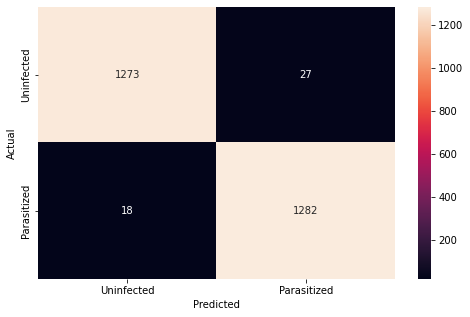

In [ ]:
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

pred = model1.predict(test_images)

pred = np.argmax(pred, axis = 1) 

y_true = np.argmax(test_labels, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

<b> Plotting the train and the validation curves

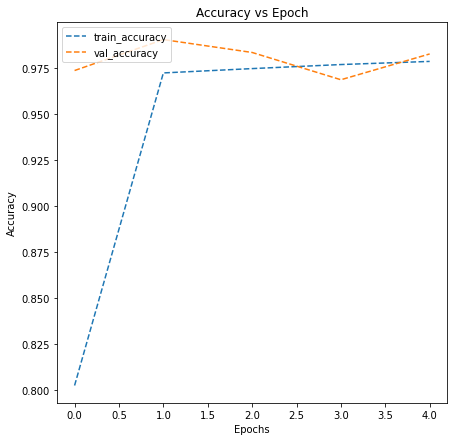

In [ ]:
plot_accuracy(history1)

Observations


*   It seems that the underfitting issue might be slightly better in this model, but there is a ~1% decrease in accuracy, precision, and F1-score.


###<b>Think about it:</b><br>
Now let's build a model with LeakyRelu as the activation function  

*  Can the model performance be improved if we change our activation function to LeakyRelu?
*  Can BatchNormalization improve our model?

Let us try to build a model using BatchNormalization and using LeakyRelu as our activation function.

###<b> Model 2 with Batch Normalization

In [ ]:
backend.clear_session() # Clearing the backend for new model

###<b> Building the Model

In [ ]:
model2 = Sequential()


model2.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), padding = 'same'))
model2.add(LeakyReLU(alpha=0.05))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size = 2))
model2.add(Dropout(0.2))

model2.add(Conv2D(32, (3, 3), padding = 'same'))
model2.add(LeakyReLU(alpha=0.05))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size = 2))
model2.add(Dropout(0.2))

model2.add(Conv2D(32, (3, 3), padding = 'same'))
model2.add(LeakyReLU(alpha=0.05))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size = 2))
model2.add(Dropout(0.2))

model2.add(Conv2D(32, (3, 3), padding = 'same'))
model2.add(LeakyReLU(alpha=0.05))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size = 2))
model2.add(Dropout(0.2))

model2.add(Flatten())

model2.add(Dense(512, activation = "relu"))

model2.add(Dropout(0.4))

model2.add(Dense(2, activation = 'softmax'))

adam = optimizers.Adam(learning_rate = 0.001)

model2.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 64, 64, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 64, 64, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9

###<b>Compiling the model

In [ ]:
model2.compile(loss = "binary_crossentropy", optimizer = adam, metrics = ['accuracy'])

<b> Using callbacks

In [ ]:
'''

#create the callbacks similarly as done in the base model
#As callbacks will help us in saving our checkpoints and stopping at an accuracy where the model doesnot seem to improve

'''

'\n\n#create the callbacks similarly as done in the base model\n#As callbacks will help us in saving our checkpoints and stopping at an accuracy where the model doesnot seem to improve\n\n'

In [ ]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 7),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

<b>Fit and train the model

In [ ]:
history2 = model2.fit(train_images, train_labels, batch_size = 32, callbacks = callbacks, validation_split = 0.2, epochs = 20, verbose = 1)

Epoch 1/20
624/624 [==============================] - 9s 11ms/step - loss: 0.3117 - accuracy: 0.8593 - val_loss: 0.0617 - val_accuracy: 0.9936
Epoch 2/20
624/624 [==============================] - 6s 9ms/step - loss: 0.0852 - accuracy: 0.9735 - val_loss: 0.0573 - val_accuracy: 0.9902
Epoch 3/20
624/624 [==============================] - 6s 10ms/step - loss: 0.0758 - accuracy: 0.9754 - val_loss: 0.0498 - val_accuracy: 0.9870
Epoch 4/20
624/624 [==============================] - 5s 9ms/step - loss: 0.0706 - accuracy: 0.9768 - val_loss: 0.0479 - val_accuracy: 0.9896
Epoch 5/20
624/624 [==============================] - 6s 10ms/step - loss: 0.0638 - accuracy: 0.9785 - val_loss: 0.0317 - val_accuracy: 0.9924
Epoch 6/20
624/624 [==============================] - 6s 9ms/step - loss: 0.0633 - accuracy: 0.9789 - val_loss: 0.0191 - val_accuracy: 0.9960
Epoch 7/20
624/624 [==============================] - 6s 10ms/step - loss: 0.0637 - accuracy: 0.9784 - val_loss: 0.0676 - val_accuracy: 0.9824
Ep

<b>Plotting the train and validation accuracy

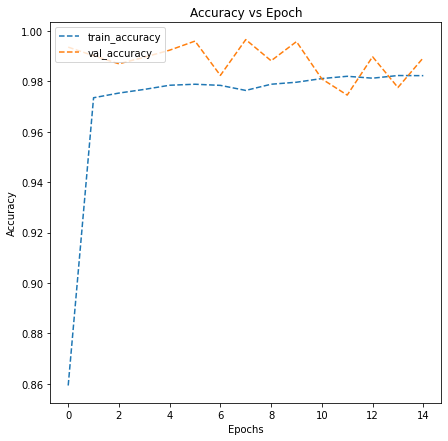

In [ ]:
# Plotting the accuracies
plot_accuracy(history2)

###<b>Evaluating the model

In [ ]:
# Evaluate the model to calculate the accuracy

accuracy = model2.evaluate(test_images, test_labels, verbose = 1)
print('\n', 'Test_Accuracy:-', accuracy[1])

82/82 [==============================] - 1s 5ms/step - loss: 0.0454 - accuracy: 0.9838

 Test_Accuracy:- 0.983846127986908


####<b>Observations and insights: 

*   The addition of batch normalization does not seem to improve the model significantly. 
*   There seems to still be some underfitting but it is not ver siginficant as the validation and training accuracy are very similar. And the test accuracy is ~99%. 



<b> Generate the classification report and confusion matrix 

82/82 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1300
           1       0.99      0.98      0.98      1300

    accuracy                           0.98      2600
   macro avg       0.98      0.98      0.98      2600
weighted avg       0.98      0.98      0.98      2600



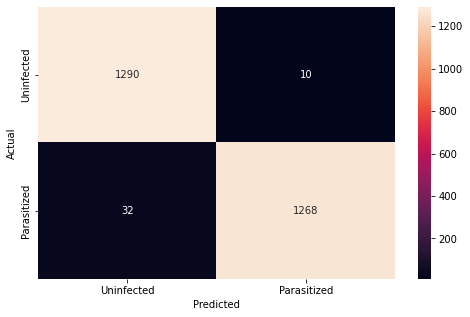

In [ ]:
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

pred = model2.predict(test_images)

pred = np.argmax(pred, axis = 1) 

y_true = np.argmax(test_labels, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred))

# Plotting the heatmap using confusion matrix

cm = confusion_matrix(y_true, pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

###**Think About It :**<br>

* Can we improve the model with Image Data Augmentation?
* References to image data augmentation can be seen below:
  *   [Image Augmentation for Computer Vision](https://www.mygreatlearning.com/blog/understanding-data-augmentation/)
  *   [How to Configure Image Data Augmentation in Keras?](https://machinelearningmastery.com/how-to-configure-image-data-augmentation-when-training-deep-learning-neural-networks/)





###<b>Model 3 with Data Augmentation

In [ ]:
backend.clear_session() # Clearing backend for new model

###<b> Using image data generator

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, test_size = 0.2, random_state = 42)

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Using ImageDataGenerator to generate images
train_datagen = ImageDataGenerator(horizontal_flip = True, 
                                  zoom_range = 0.07, rotation_range = 30, fill_mode = 'constant')

val_datagen  = ImageDataGenerator()

# Flowing training images using train_datagen generator
train_generator = train_datagen.flow(x = train_images, y = train_labels, batch_size = 64, seed = 42, shuffle = True)


# Flowing validation images using val_datagen generator
val_generator =  val_datagen.flow(x = test_images, y = test_labels, batch_size = 64, seed = 42, shuffle = True)

###**Think About It :**<br>

*  Check if the performance of the model can be improved by changing different parameters in the ImageDataGenerator.



####<B>Visualizing Augmented images

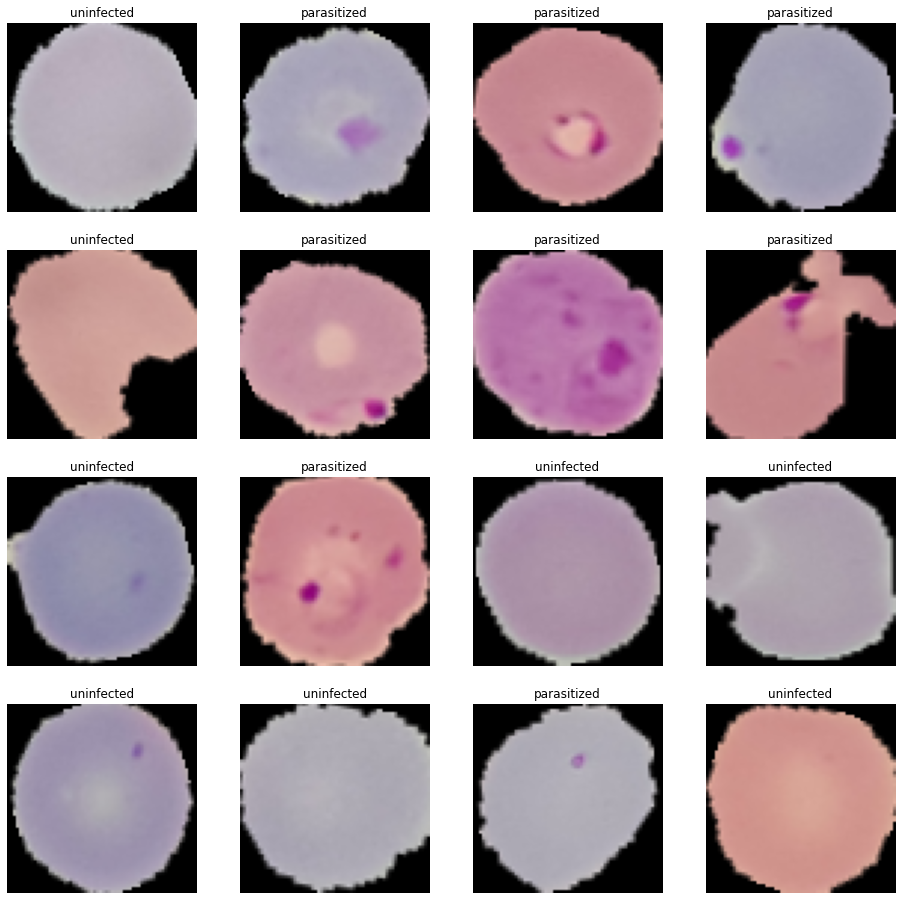

In [ ]:
# Creating an iterable for images and labels from the training data
images, labels = next(train_generator)

# Plotting 16 images from the training data
fig, axes = plt.subplots(4, 4, figsize = (16, 8))

fig.set_size_inches(16, 16)
for (image, label, ax) in zip(images, labels, axes.flatten()):

    ax.imshow(image)

    if label[1] == 1: 

        ax.set_title('parasitized')

    else:

        ax.set_title('uninfected')

    ax.axis('off')

####<b>Observations and insights: 

*    Image augmentation helps increase the diversity and variability in the training data in our algorithm. With a larger, diverse dataset, the neural network will be better trained.
*   By augmenting the images, the model is exposed to a wider range of variations, reducing the chance of overfitting and increasing its overall generalization ability.
*   In the Milestone 1 we used HSV augmentation which could have proved useful here. For this type of augmentation, it will be important to consider the way the augmentation influences the data. Many of these variables will provide additional datasets, but ensuring that the zoom factor needs to be considered carefully to ensure that infected parasites are not missed




###<b>Building the Model

In [ ]:
model3 = Sequential()

model3.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", input_shape = (64, 64, 3)))
model3.add(LeakyReLU(alpha=0.05))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size = 2))
model3.add(Dropout(0.2))

model3.add(Conv2D(64, (3, 3), padding = 'same'))
model3.add(LeakyReLU(alpha=0.05))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size = 2))
model3.add(Dropout(0.2))

model3.add(Conv2D(128, (3, 3), padding = 'same'))
model3.add(LeakyReLU(alpha=0.05))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size = 2))
model3.add(Dropout(0.2))

model3.add(Flatten())

model3.add(Dense(512))
model3.add(LeakyReLU(alpha=0.05))

model3.add(Dropout(0.4))

model3.add(Dense(2, activation = 'softmax'))

adam = optimizers.Adam(learning_rate = 0.001)

model3.compile(loss = 'binary_crossentropy', optimizer = adam, metrics = ['accuracy'])

model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        416       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 64, 64, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 64, 64, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        1

<b>Using Callbacks

In [ ]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

<b> Fit and Train the model

In [ ]:
history3 = model3.fit(train_generator,
                      validation_data = val_generator,
                      batch_size = 32, callbacks = callbacks,
                      epochs = 30, verbose = 1)

Epoch 1/30
390/390 [==============================] - 37s 93ms/step - loss: 0.5509 - accuracy: 0.8100 - val_loss: 4.6846 - val_accuracy: 0.4762
Epoch 2/30
390/390 [==============================] - 34s 87ms/step - loss: 0.1267 - accuracy: 0.9623 - val_loss: 0.1521 - val_accuracy: 0.9635
Epoch 3/30
390/390 [==============================] - 36s 92ms/step - loss: 0.0978 - accuracy: 0.9715 - val_loss: 0.0699 - val_accuracy: 0.9804
Epoch 4/30
390/390 [==============================] - 36s 91ms/step - loss: 0.0848 - accuracy: 0.9735 - val_loss: 0.1706 - val_accuracy: 0.9304
Epoch 5/30
390/390 [==============================] - 37s 96ms/step - loss: 0.0801 - accuracy: 0.9745 - val_loss: 0.0502 - val_accuracy: 0.9846
Epoch 6/30
390/390 [==============================] - 35s 89ms/step - loss: 0.0771 - accuracy: 0.9771 - val_loss: 0.0639 - val_accuracy: 0.9869
Epoch 7/30
390/390 [==============================] - 36s 93ms/step - loss: 0.0734 - accuracy: 0.9774 - val_loss: 0.0546 - val_accuracy:

###<B>Evaluating the model

<b>Plot the train and validation accuracy

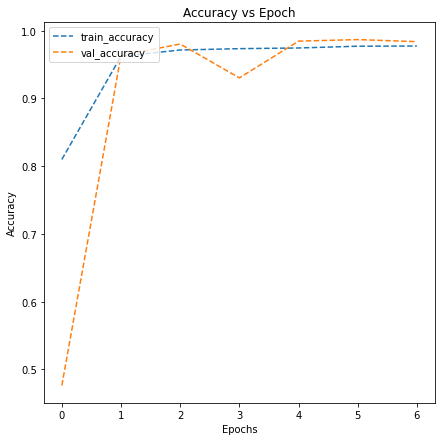

In [ ]:
# Potting the accuracies
plot_accuracy(history3)

In [ ]:
# Evaluating the model on test data
accuracy3 = model3.evaluate(test_images, test_labels, verbose = 1)

print('\n', 'Test_Accuracy:-', accuracy3[1])

82/82 [==============================] - 1s 6ms/step - loss: 0.0546 - accuracy: 0.9838

 Test_Accuracy:- 0.983846127986908


<B>Plotting the classification report and confusion matrix

82/82 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1300
           1       0.98      0.99      0.98      1300

    accuracy                           0.98      2600
   macro avg       0.98      0.98      0.98      2600
weighted avg       0.98      0.98      0.98      2600



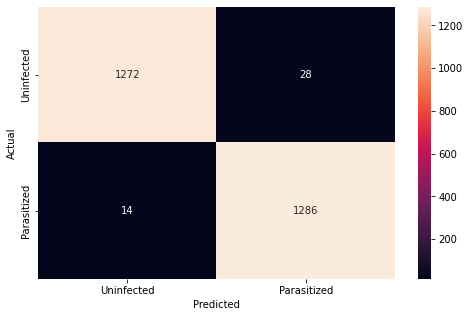

In [ ]:
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

pred = model3.predict(test_images)

pred = np.argmax(pred, axis = 1) 

y_true = np.argmax(test_labels, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred))

# Plotting the heatmap using confusion matrix

cm = confusion_matrix(y_true, pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

<b> Now, let us try to use a pretrained model like VGG16 and check how it performs on our data.

### **Pre-trained model (VGG16)**

In [ ]:
# Clearing backend
from tensorflow.keras import backend

backend.clear_session()

# Fixing the seed for random number generators
np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16

from tensorflow.keras import Model

vgg = VGG16(include_top = False, weights = 'imagenet', input_shape = (64, 64, 3))

vgg.summary()

58889256/58889256 [==============================] - 4s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                              

In [ ]:
transfer_layer = vgg.get_layer('block5_pool')

vgg.trainable = False

# Add classification layers on top of it  
x = Flatten()(transfer_layer.output)  # Flatten the output from the 3rd block of the VGG16 model

x = Dense(256, activation = 'relu')(x)

# Similarly add a dense layer with 128 neurons
x = Dropout(0.3)(x)

# Add a dense layer with 64 neurons
x = BatchNormalization()(x)

pred = Dense(2, activation = 'softmax')(x)

model4 = Model(vgg.input, pred) # Initializing the model

###<b>Compiling the model

In [ ]:
# Compiling the model
model4.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy']) 

<b> using callbacks

In [ ]:
# Adding Callbacks to the model
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

<b>Fit and Train the model

In [ ]:
# Fitting the model and running the model for 10 epochs
history4 = model4.fit(
            train_images, train_labels,
            epochs = 10,
            callbacks = callbacks,
            batch_size = 20,
            validation_split = 0.2,
            verbose = 1)

Epoch 1/10
999/999 [==============================] - 23s 21ms/step - loss: 0.2459 - accuracy: 0.9044 - val_loss: 0.1958 - val_accuracy: 0.9645
Epoch 2/10
999/999 [==============================] - 20s 20ms/step - loss: 0.2028 - accuracy: 0.9201 - val_loss: 0.1413 - val_accuracy: 0.9814
Epoch 3/10
999/999 [==============================] - 20s 20ms/step - loss: 0.2015 - accuracy: 0.9216 - val_loss: 0.2217 - val_accuracy: 0.9447
Epoch 4/10
999/999 [==============================] - 20s 20ms/step - loss: 0.1936 - accuracy: 0.9247 - val_loss: 0.0842 - val_accuracy: 0.9840
Epoch 5/10
999/999 [==============================] - 20s 20ms/step - loss: 0.1877 - accuracy: 0.9293 - val_loss: 0.0717 - val_accuracy: 0.9882
Epoch 6/10
999/999 [==============================] - 20s 20ms/step - loss: 0.1899 - accuracy: 0.9282 - val_loss: 0.1885 - val_accuracy: 0.9517
Epoch 7/10
999/999 [==============================] - 22s 22ms/step - loss: 0.1820 - accuracy: 0.9318 - val_loss: 0.1113 - val_accuracy:

<b>Plot the train and validation accuracy

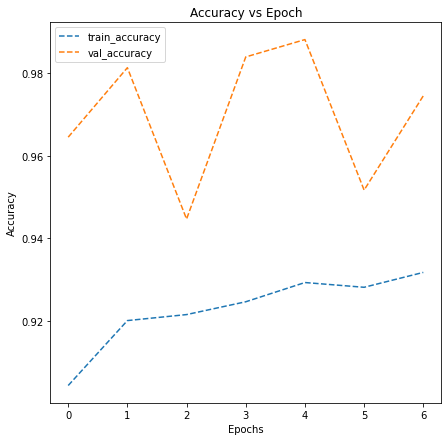

In [ ]:
# plotting the accuracies
plot_accuracy(history4)

###**Observations and insights: **

*   What can be observed from the validation and train curves?
*   There is significant underfitting in this model and as well the test accuracy has decreased significantly

###<b> Evaluating the model

In [ ]:
# Evaluating the model on test data
accuracy4 = model4.evaluate(test_images, test_labels, verbose = 1)
print('\n', 'Test_Accuracy:-', accuracy4[1])

82/82 [==============================] - 2s 22ms/step - loss: 0.1391 - accuracy: 0.9504

 Test_Accuracy:- 0.9503846168518066


<b>Plotting the classification report and confusion matrix

82/82 [==============================] - 1s 16ms/step
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1300
           1       0.96      0.94      0.95      1300

    accuracy                           0.95      2600
   macro avg       0.95      0.95      0.95      2600
weighted avg       0.95      0.95      0.95      2600



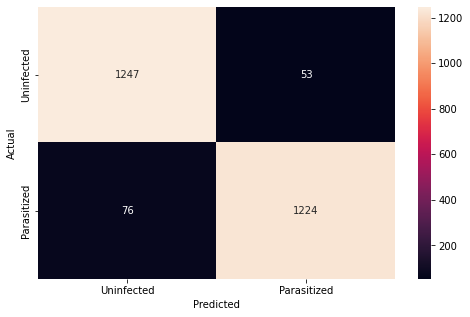

In [ ]:
# Plot the confusion matrix and generate a classification report for the model
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

pred = model4.predict(test_images)

pred = np.argmax(pred, axis = 1) 

y_true = np.argmax(test_labels, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred))

# Plotting the heatmap using confusion matrix

cm = confusion_matrix(y_true, pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

###<b>Think about it:</b>
*  What observations and insights can be drawn from the confusion matrix and classification report? Model 4 comparitavely is the worst in terms of accuracy, percision, F1-score, and underfitting. 


*  Choose the model with the best accuracy scores from all the above models and save it as a final model. I would consider using Model 3 and with further image augmentation such as HSV. Further conclusions will be provided in the milestone report.


####<b> Observations and Conclusions drawn from the final model: _____



**Improvements that can be done:**<br>


*  Can the model performance be improved using other pre-trained models or different CNN architecture?
*  You can try to build a model using these HSV images and compare them with your other models.

#### **Insights**

####**Refined insights**:
- What are the most meaningful insights from the data relevant to the problem?

####**Comparison of various techniques and their relative performance**:
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

####**Proposal for the final solution design**:
- What model do you propose to be adopted? Why is this the best solution to adopt?

In [ ]:
backend.clear_session() # Clearing backend for new model

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, test_size = 0.2, random_state = 42)

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Using ImageDataGenerator to generate images
train_datagen = ImageDataGenerator(horizontal_flip = True, 
                                  zoom_range = 0.07, rotation_range = 40, fill_mode = 'constant')

val_datagen  = ImageDataGenerator()

# Flowing training images using train_datagen generator
train_generator = train_datagen.flow(x = train_images, y = train_labels, batch_size = 64, seed = 42, shuffle = True)


# Flowing validation images using val_datagen generator
val_generator =  val_datagen.flow(x = test_images, y = test_labels, batch_size = 64, seed = 42, shuffle = True)

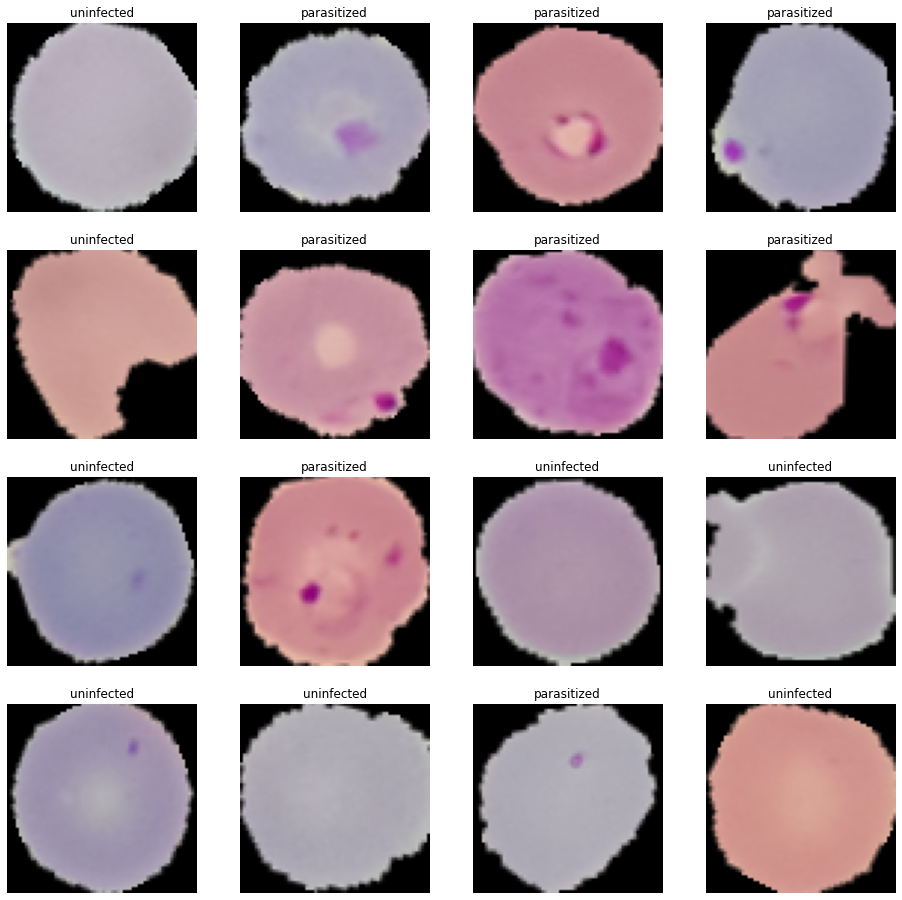

In [ ]:
# Creating an iterable for images and labels from the training data
images, labels = next(train_generator)

# Plotting 16 images from the training data
fig, axes = plt.subplots(4, 4, figsize = (16, 8))

fig.set_size_inches(16, 16)
for (image, label, ax) in zip(images, labels, axes.flatten()):

    ax.imshow(image)

    if label[1] == 1: 

        ax.set_title('parasitized')

    else:

        ax.set_title('uninfected')

    ax.axis('off')

In [ ]:
model5 = Sequential()

#1st layer
model5.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", input_shape = (64, 64, 3)))
model5.add(LeakyReLU(alpha=0.05))
model5.add(BatchNormalization())

#2nd layer
model5.add(Conv2D(32, (3, 3), padding = 'same'))
model5.add(LeakyReLU(alpha=0.05))
model5.add(BatchNormalization())

#3rd layer
model5.add(Conv2D(32, (3, 3), padding = 'same'))
model5.add(LeakyReLU(alpha=0.05))
model5.add(BatchNormalization())
model5.add(MaxPooling2D(pool_size = 2))
model5.add(Dropout(0.2))

#4th layer
model5.add(Conv2D(filters = 64, kernel_size = 2, padding = "same", input_shape = (64, 64, 3)))
model5.add(LeakyReLU(alpha=0.05))
model5.add(BatchNormalization())

#5th layer
model5.add(Conv2D(64, (3, 3), padding = 'same'))
model5.add(LeakyReLU(alpha=0.05))
model5.add(BatchNormalization())

#6th layer
model5.add(Conv2D(64, (3, 3), padding = 'same'))
model5.add(LeakyReLU(alpha=0.05))
model5.add(BatchNormalization())
model5.add(MaxPooling2D(pool_size = 2))
model5.add(Dropout(0.2))

#7th layer
model5.add(Conv2D(128, (3, 3), padding = 'same'))
model5.add(LeakyReLU(alpha=0.05))
model5.add(BatchNormalization())

#8th layer
model5.add(Conv2D(128, (3, 3), padding = 'same'))
model5.add(LeakyReLU(alpha=0.05))
model5.add(BatchNormalization())
model5.add(MaxPooling2D(pool_size = 2))
model5.add(Dropout(0.2))

model5.add(Flatten())

model5.add(LeakyReLU(alpha=0.05))

model5.add(Dropout(0.4))

model5.add(Dense(2, activation = 'softmax'))

adam = optimizers.Adam(learning_rate = 0.0001)

model5.compile(loss = 'binary_crossentropy', optimizer = adam, metrics = ['accuracy'])

model5.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 64, 64, 32)        416       
                                                                 
 leaky_re_lu_8 (LeakyReLU)   (None, 64, 64, 32)        0         
                                                                 
 batch_normalization_8 (Batc  (None, 64, 64, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_9 (Conv2D)           (None, 64, 64, 32)        9248      
                                                                 
 leaky_re_lu_9 (LeakyReLU)   (None, 64, 64, 32)        0         
                                                                 
 batch_normalization_9 (Batc  (None, 64, 64, 32)       128       
 hNormalization)                                      

In [ ]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

In [ ]:
history5 = model5.fit(train_generator,
                      validation_data = val_generator,
                      batch_size = 32, callbacks = callbacks,
                      epochs = 30, verbose = 1)

Epoch 1/30
390/390 [==============================] - 42s 103ms/step - loss: 0.7325 - accuracy: 0.7313 - val_loss: 0.5014 - val_accuracy: 0.7935
Epoch 2/30
390/390 [==============================] - 41s 104ms/step - loss: 0.1807 - accuracy: 0.9441 - val_loss: 0.0837 - val_accuracy: 0.9738
Epoch 3/30
390/390 [==============================] - 41s 106ms/step - loss: 0.1098 - accuracy: 0.9659 - val_loss: 0.0535 - val_accuracy: 0.9823
Epoch 4/30
390/390 [==============================] - 39s 101ms/step - loss: 0.0934 - accuracy: 0.9709 - val_loss: 0.0516 - val_accuracy: 0.9854
Epoch 5/30
390/390 [==============================] - 38s 97ms/step - loss: 0.0825 - accuracy: 0.9724 - val_loss: 0.0557 - val_accuracy: 0.9831
Epoch 6/30
390/390 [==============================] - 39s 99ms/step - loss: 0.0777 - accuracy: 0.9763 - val_loss: 0.0440 - val_accuracy: 0.9854
Epoch 7/30
390/390 [==============================] - 40s 101ms/step - loss: 0.0718 - accuracy: 0.9773 - val_loss: 0.0413 - val_accu

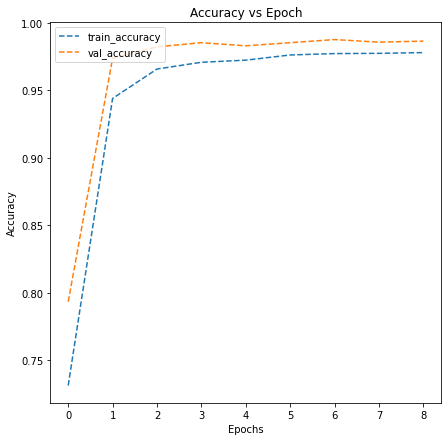

In [ ]:
# Potting the accuracies
plot_accuracy(history5)

In [ ]:
# Evaluating the model on test data
accuracy5 = model5.evaluate(test_images, test_labels, verbose = 1)

print('\n', 'Test_Accuracy:-', accuracy3[1])

82/82 [==============================] - 1s 9ms/step - loss: 0.0420 - accuracy: 0.9865

 Test_Accuracy:- 0.983846127986908


82/82 [==============================] - 1s 6ms/step
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1300
           1       0.99      0.98      0.99      1300

    accuracy                           0.99      2600
   macro avg       0.99      0.99      0.99      2600
weighted avg       0.99      0.99      0.99      2600



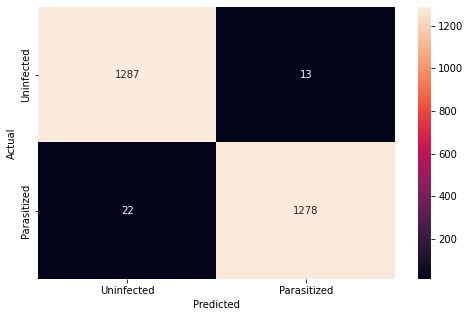

In [ ]:
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

pred = model5.predict(test_images)

pred = np.argmax(pred, axis = 1) 

y_true = np.argmax(test_labels, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred))

# Plotting the heatmap using confusion matrix

cm = confusion_matrix(y_true, pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


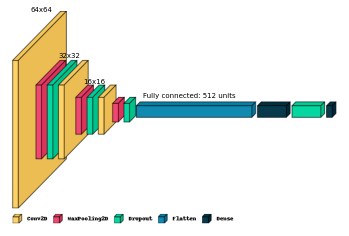

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.8/dist-packages/matplotlib/pyplot.py'>

In [ ]:
!pip install visualkeras
import visualkeras
from visualkeras import layered_view
import matplotlib.font_manager as fm

def show_model5(model5):
    # Generate the visualization
    layer_viz = layered_view(model, legend=True, min_z=10, draw_funnel=False)
    # Display the visualization
    plt.imshow(layer_viz, aspect='auto')
    plt.axis('off')
    font = fm.FontProperties(size=7)
    plt.text(40,0, '64x64', fontproperties=font)
    plt.text(90,80, '32x32', fontproperties=font)
    plt.text(135,125, '16x16', fontproperties=font)
    plt.text(240,150, 'Fully connected: 512 units', fontproperties=font)
    plt.show()
    return plt
    
show_model5(model5)
